In [1]:
import fcmpy
from fcmpy import FcmSimulator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The shown edges in the images, are stored as a `weight_matrix`.

In [2]:
weight_matrix = pd.DataFrame(np.array([[0, 1, -1],[-1,0,0], [1,0,0]]),
                             columns=['Human', 'Virus', 'Food'])
weight_matrix

,Human,Virus,Food
0,0,1,-1
1,-1,0,0
2,1,0,0


In [3]:
init_state = {'Virus': 0.2,'Human': 0.5,"Food": 0.5}

Initalise the simulation function `FcmSimulator` from `fcmpy`.

In [4]:
sim = FcmSimulator()

### Different Activation functions

**Sigmoid** <br>
In our first scenario the simulation is done with the `sigmoid` activation function. The values converge after 9 iterations, which indicates a stable pattern (equilibrium).

**TanH** <br>
In the second scenario the simulation is done with the `tanh` activation function. Here cyclic behaviour can be seen, which does not converge. In our example it is a repeating pattern.

In [5]:
res_sigmoid = sim.simulate(initial_state=init_state, weight_matrix=weight_matrix, transfer='sigmoid', inference='mKosko', thresh=0.001, iterations=50, l=1)

The values converged in the 9 state (e <= 0.001)


In [6]:
res_hyperbolic = sim.simulate(initial_state=init_state, weight_matrix=weight_matrix, transfer='tanh',
                           inference='mKosko', thresh=0.001, iterations=50, l=1)

/usr/local/lib/python3.8/site-packages/fcmpy/simulator/simulator.py:171: UserWarning: The values didn't converge. More iterations are required!
  warnings.warn("The values didn't converge. More iterations are required!")


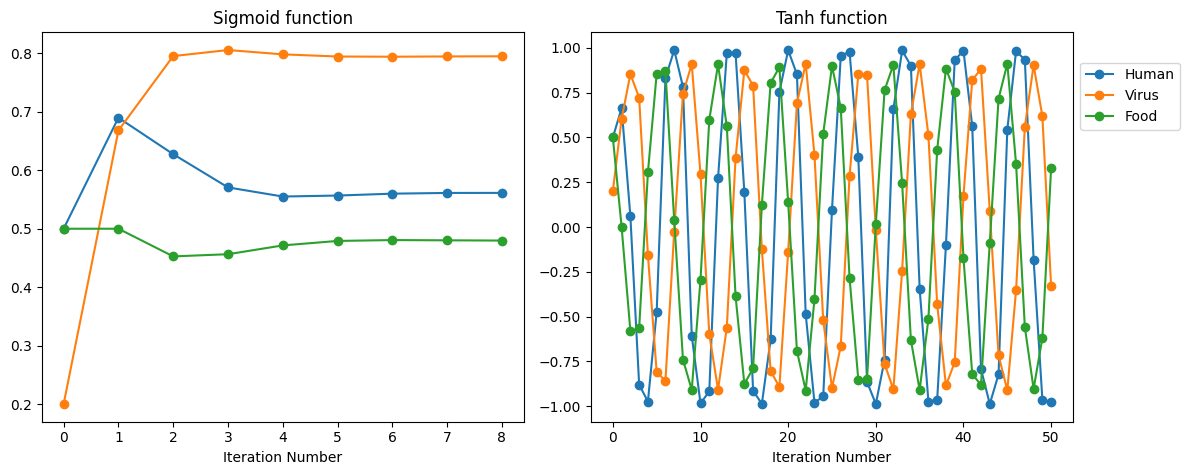

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Two plots side-by-side

res_sigmoid.plot(ax=axes[0], marker='o')
axes[0].get_legend().remove()
axes[0].set_xlabel("Iteration Number")
axes[0].set_title("Sigmoid function")  # Individual title for left plot

res_hyperbolic.plot(ax=axes[1], marker='o')
axes[1].legend(bbox_to_anchor=(1, 0.94))
axes[1].set_xlabel("Iteration Number")
axes[1].set_title("Tanh function")  # Individual title for right plot

#fig.text(0.5, 0.02, "Different Components for the Same Models", ha="center", fontsize=12)

# Step 4: Adjust layout for spacing
plt.tight_layout(rect=[0, 0.03, 1, 1])  # Leave space for the shared x-label

# Step 5: Show the plots
plt.show()


## Intervention

After getting a feeling for the simulation of a scenario. Here we take a look at possible interventions

In [8]:
from fcmpy import FcmIntervention

In [9]:
inter = FcmIntervention(FcmSimulator)

In [10]:
inter.initialize(initial_state=init_state, weight_matrix=weight_matrix,transfer="tanh", inference="mKosko",thresh=0.001, iterations=50, l=1)

/usr/local/lib/python3.8/site-packages/fcmpy/simulator/simulator.py:171: UserWarning: The values didn't converge. More iterations are required!
  warnings.warn("The values didn't converge. More iterations are required!")


In [11]:
inter.test_results["baseline"]

,Human,Virus,Food
0,0.500000,0.200000,0.500000
1,0.664037,0.604368,0.000000
2,0.059598,0.853365,-0.581044
3,-0.879784,0.722551,-0.565336
4,-0.974144,-0.155949,0.304478
5,-0.472836,-0.811051,0.856117
6,0.831918,-0.857517,0.868993
7,0.988082,-0.025594,0.037059
8,0.782092,0.745385,-0.740246
9,-0.606609,0.909992,-0.909104


Here we add an interventen, where hunters are allowed to remove some Viruss per season. This is why kind of intervention is remarked `continuous`. 

In [12]:
inter.add_intervention("Vaccine", type="continuous", impact={"Virus":-0.3}, effectiveness=1)

In [13]:
inter.test_intervention("Vaccine", iterations=50)

/usr/local/lib/python3.8/site-packages/fcmpy/simulator/simulator.py:171: UserWarning: The values didn't converge. More iterations are required!
  warnings.warn("The values didn't converge. More iterations are required!")


In [14]:
intervention_vaccine = inter.test_results["Vaccine"][["Human", "Virus", "Food"]]

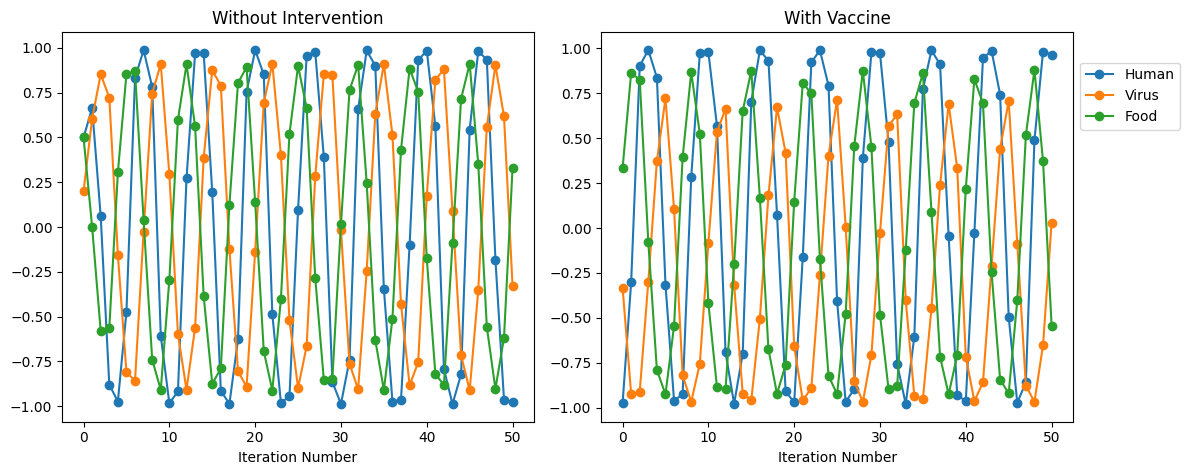

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Two plots side-by-side

res_hyperbolic.plot(ax=axes[0], marker='o')
axes[0].get_legend().remove()
axes[0].set_xlabel("Iteration Number")
axes[0].set_title("Without Intervention")  # Individual title for left plot

intervention_vaccine.plot(ax=axes[1], marker='o')
axes[1].legend(bbox_to_anchor=(1, 0.94))
axes[1].set_xlabel("Iteration Number")
axes[1].set_title("With Vaccine")  # Individual title for right plot

#fig.text(0.5, 0.02, "Different Components for the Same Models", ha="center", fontsize=12)

# Step 4: Adjust layout for spacing
plt.tight_layout(rect=[0, 0.03, 1, 1])  # Leave space for the shared x-label

# Step 5: Show the plots
plt.show()
